# PRCP-1025-FlightPricePrediction

## TEAM ID:"PTID-CDS-AUG-24-2047"

## BATCH ID: 08-APR-24-CDS-BUN-021-WDM09-BAN

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight
prices and plan their journey accordingly.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read files
df=pd.read_excel(r"C:\Users\Varun Kumar\Desktop\capstone_projects\prcp 1025 Flight Fare Prediction\flight-fare\Flight_Fare.xlsx")

In [3]:
#Shape of the DataFrame
df.shape

(10683, 11)

## Task 1
## Prepare a complete data analysis report on the given data.

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## **DOMAIN ANALYSIS**

This database has flight journey information of different airlines.Our main objective is to create a predictive model by analysing the data and identifying the key features that influence the price of flight tickets, which will help airlines to maintain  prices and help customers plan their journey using given ten features.

### 1)AIRLINE:
This column will let us know about the type of Airlines(e.g., Indigo, Jet Airways, Air India)

### 2)DATE OF JOURNEY:
This column will let us know about the date on which the passenger’s journey will start.

### 3)SOURCE:
This column will let us know  the name of the place from where the passenger’s journey will start.

### 4)DESTINATION:
This column will let us know the name of the place to where passengers wanted to travel.

### 5)ROUTE:
This column will let us know about what the route is through which passengers have opted to travel from his/her source to their destination.

### 6)ARRIVAL TIME:
This column will let us know about the Arrival time when the passenger will reach his/her destination.

### 7)DURATION:
This column will let us know the Duration of a flight journey that will take to complete its journey from source to destination.

### 8)TOTAL STOPS:
This column will let us know in how many places flights will stop there for the flight in the whole journey.

### 9)ADDITIONAL INFO:
In this column, we will get information about food, kind of food and other amenities.

### 10)PRICE:
This column will let us know the Price of the flight for a complete journey including all the expenses before onboarding.

In [6]:
#Info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#Description of Numerical Column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [8]:
#Description of categorical columns
df.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


## Insights :

1)The dataset is flight journey dataset of different airlines with **10683 datapoints having 11 features** including target variable.

2)Dataset having both **numerical(1) as well as categorical values(10)** with one null values in **"Route"** and **"Total_Stops"** columns.

3)**"Jet Airways"** has the maximum no.of flights in the dataset with 3849 flights.

4)**"18/05/2019"** is the most traveled date.

5)**"Delhi"** and **"Cochin"** are the most travel source and destinations.

6)Max Price of a flight journey is **79512** and minimun Price of a flight journey is **1759** with std.deviation of **4611.35**.

In [9]:
#Columns of the DataFrame
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
#No.of Unique Values in each Column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [11]:
#checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# EDA

## Airlines
### Count Plot for Airlines

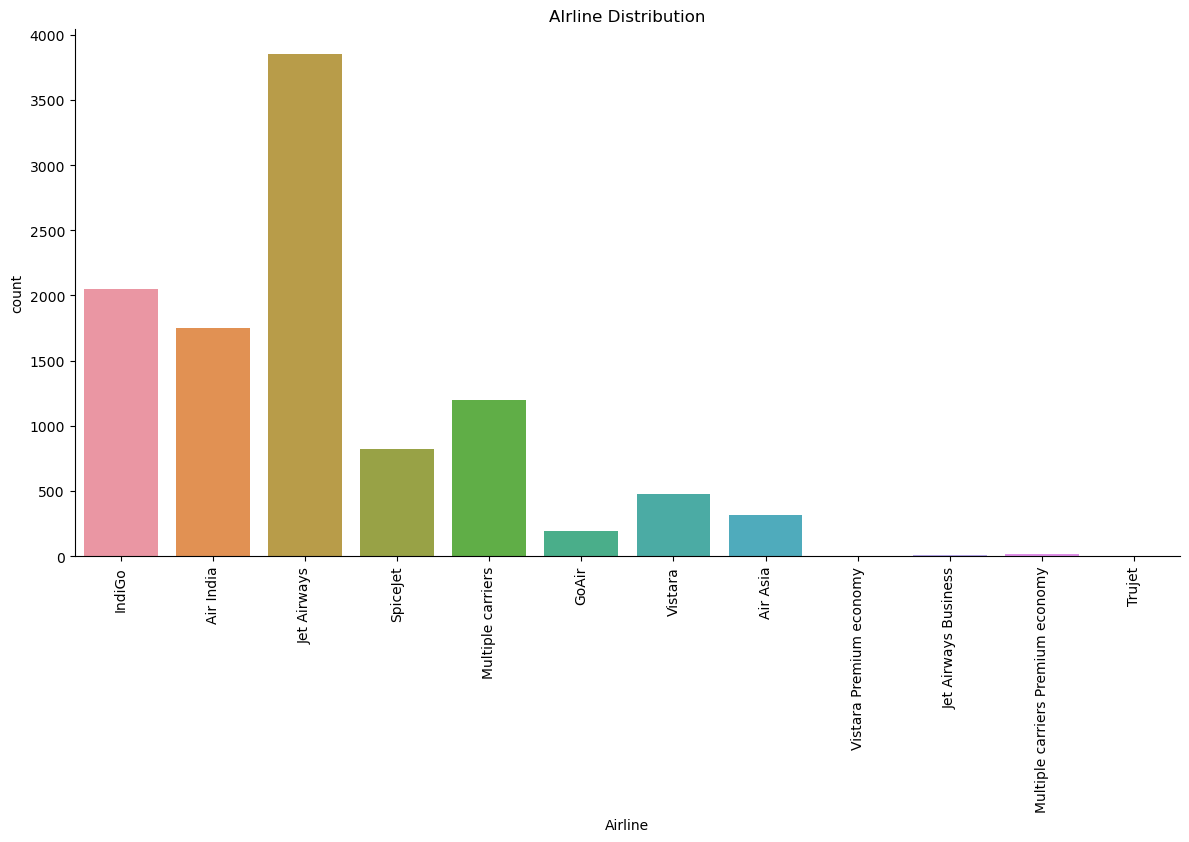

In [12]:
# Visualizing Airline distribution 
sns.catplot(data=df, x='Airline', kind='count', height=6, aspect=2)
plt.xticks(rotation=90)
plt.title('AIrline Distribution')
plt.show()

In [13]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### **Jet Airways** has the most number of flights and **Trujet** has the least number of flights.

### Airlines Vs Price

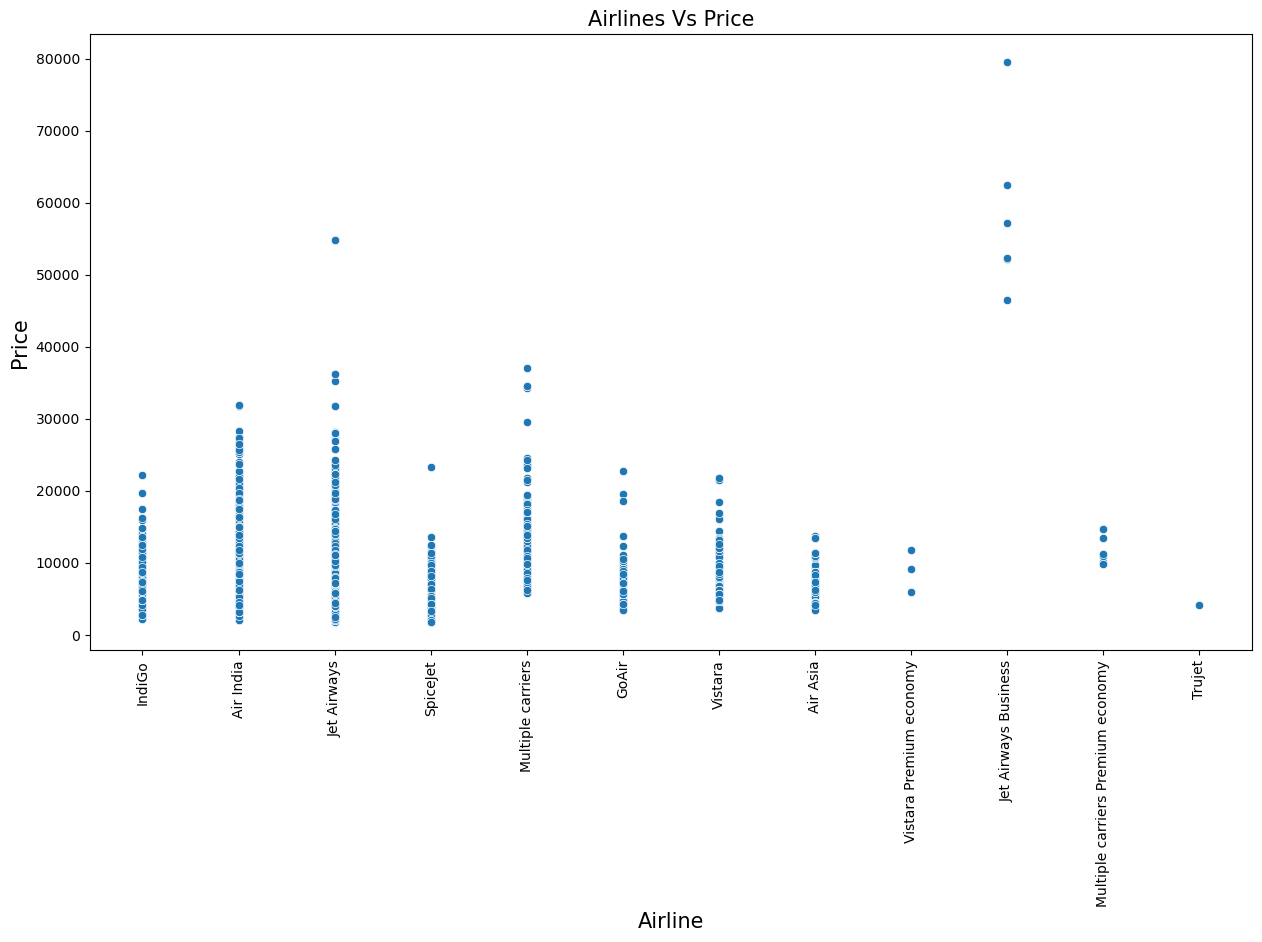

In [14]:
#Visualising Airline VS Price
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Airline'],y=df['Price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### **Jet Airways Business** has the highest flight fare compared to other airlines.

## Date of Journey
### Line Plot for Date of Journey

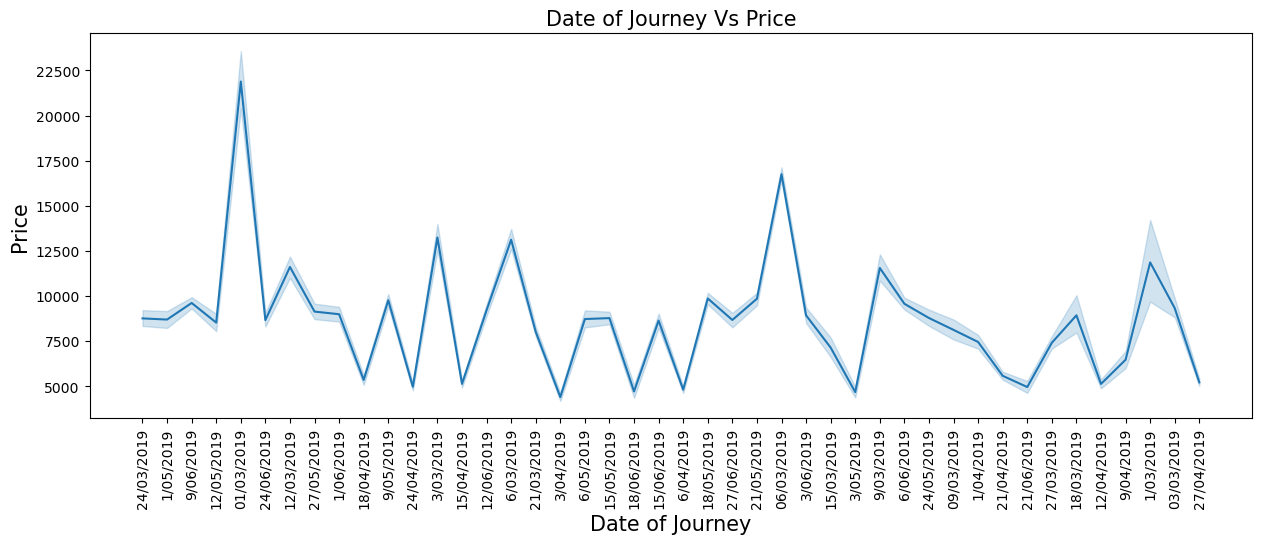

In [15]:
#Visualizing Date of Journey
plt.figure(figsize=(15,5))
sns.lineplot(x=df['Date_of_Journey'],y=df['Price'],palette='hls')
plt.title('Date of Journey Vs Price',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Date of Journey',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [16]:
df["Date_of_Journey"].value_counts().head(2)

Date_of_Journey
18/05/2019    504
6/06/2019     503
Name: count, dtype: int64

In [17]:
df["Date_of_Journey"].value_counts().tail(2)

Date_of_Journey
12/04/2019    63
1/03/2019     47
Name: count, dtype: int64

### **18/05/2019** is the most traveled date with **504** flights and **1/03/2019** is the least traveled date with **47** flights.

In [18]:
#Stripping Date of Journey to Date, Month, Year 
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [19]:
#Converting Date, Month, Year from object to int
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [20]:
#Droping Date of Journey
df.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


## Source
### Count Plot for Source

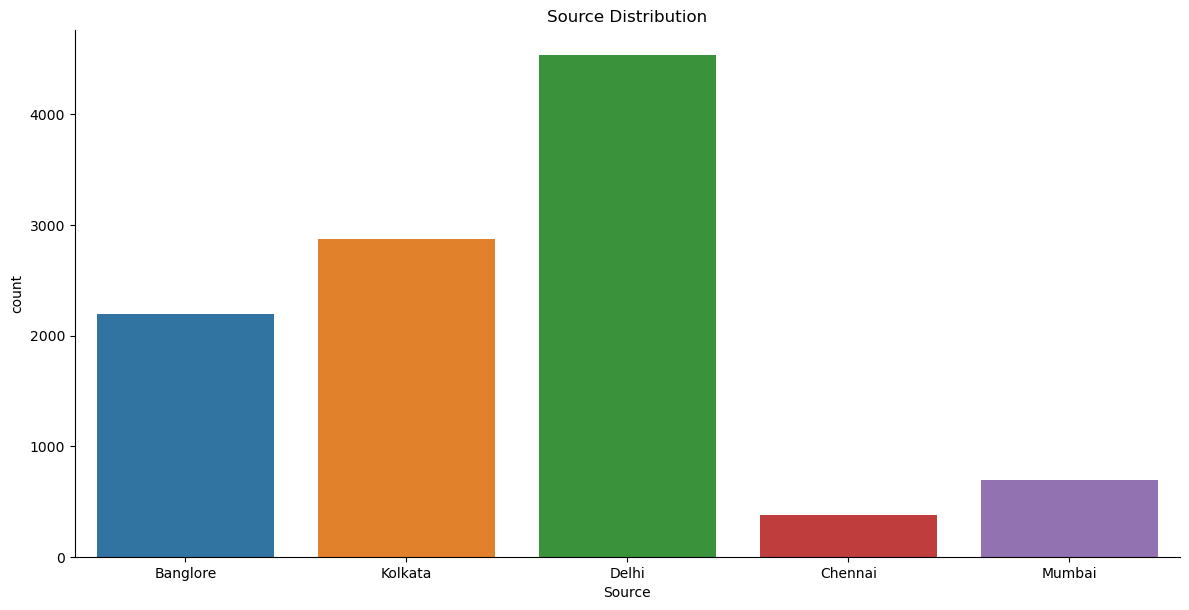

In [22]:
# Visualizing Source distribution 
sns.catplot(data=df, x='Source', kind='count', height=6, aspect=2)
plt.title('Source Distribution')
plt.show()

In [23]:
df["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

### **Delhi** is the highest journeyed source and **Chennai** is the lowest journeyed source airport.

### Source Vs Price

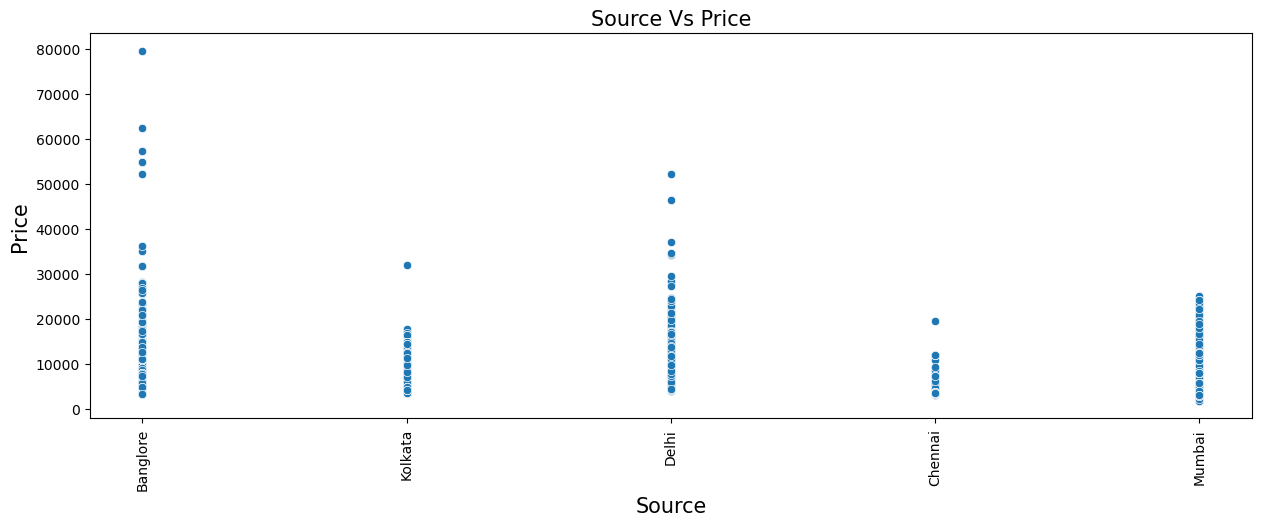

In [24]:
#Visualising Source VS Price
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Source'],y=df['Price'],palette='hls')
plt.title('Source Vs Price',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Source',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### **Bangalore** is the source airport with highest flight fare.

## Destination
### Count Plot for Destination

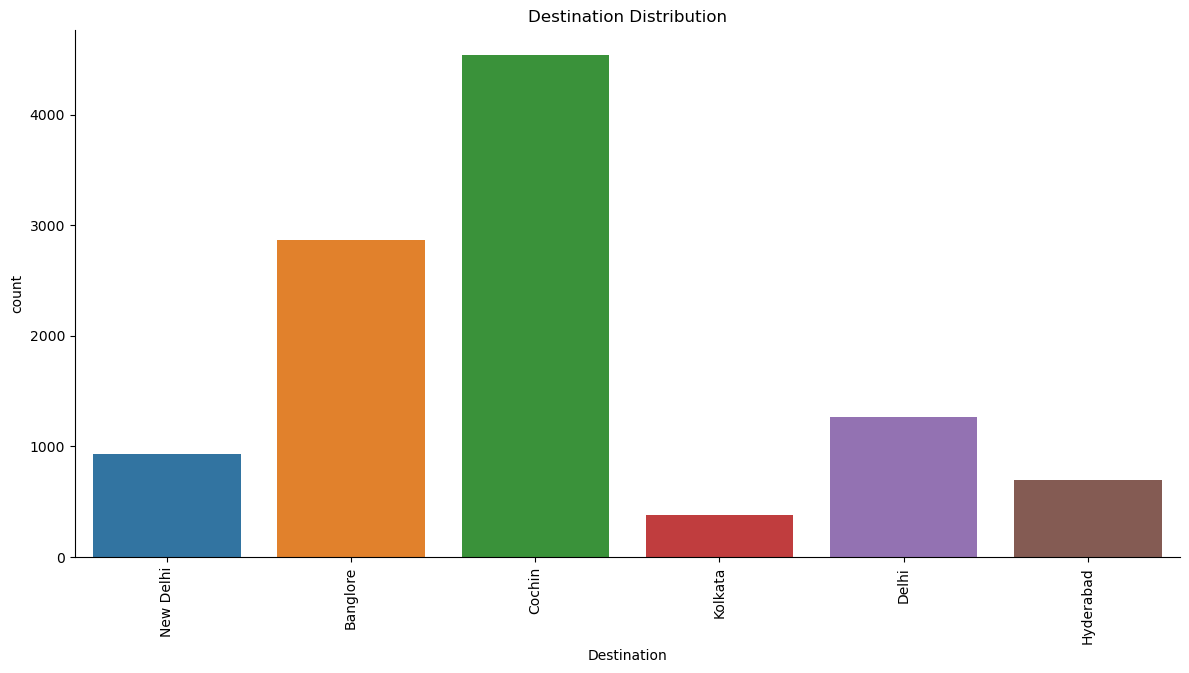

In [25]:
# Visualizing Destination distribution 
sns.catplot(data=df, x='Destination', kind='count', height=6, aspect=2)
plt.xticks(rotation=90)
plt.title('Destination Distribution')
plt.show()

In [26]:
df["Destination"].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

### **Cochin** is the most journeyed Destination and **Kolkata** is the least journeyed Destination.

### Destination Vs Price

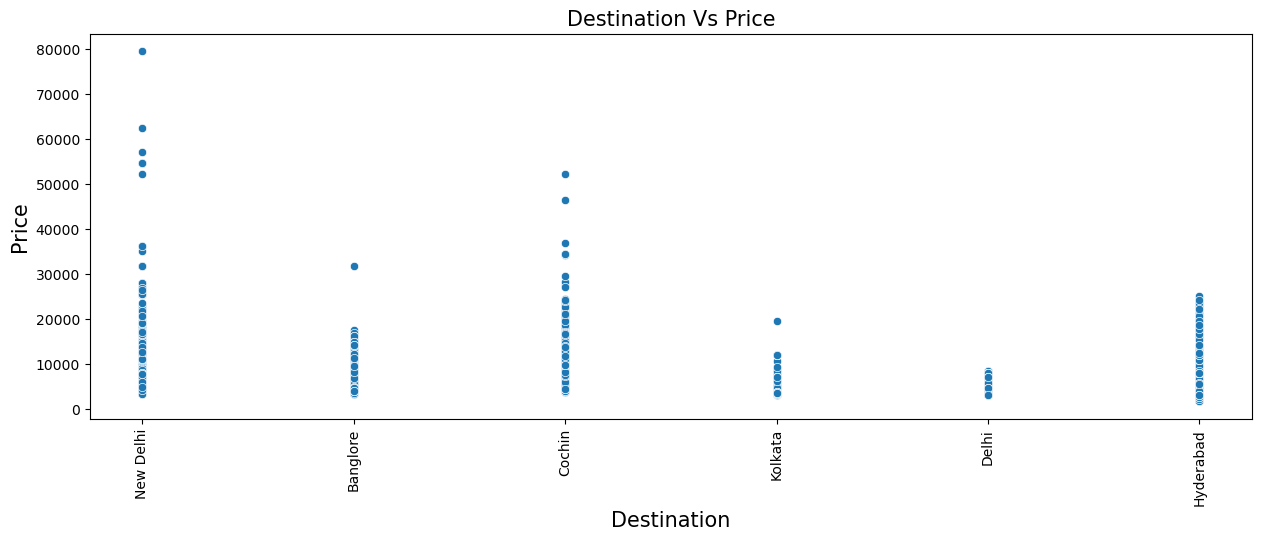

In [27]:
#Visualising Destination VS Price
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Destination'],y=df['Price'],palette='hls')
plt.title('Destination Vs Price',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Destination',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### **New Delhi** is the Destination with the highest flight fare.

## Route

In [28]:
df["Route"].value_counts().head(2)

Route
DEL → BOM → COK    2376
BLR → DEL          1552
Name: count, dtype: int64

### Most flights have the route **"DEL → BOM → COK"**.

In [29]:
#Stripping Route to Route1, Route2, Route3, Route4 and Route5
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]

In [30]:
#Drop Route
df=df.drop(['Route'],axis=1)

In [31]:
#Replaceing Nan values in Route1,Route2,Route3, Route4 and Route5 with None
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)

In [32]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,BLR,NAG,DEL,None,None


## Depature Time

In [33]:
df["Dep_Time"].value_counts().head(2)

Dep_Time
18:55    233
17:00    227
Name: count, dtype: int64

### Most flights have Departure Time **18:55**.

In [34]:
#Stripping Depature Time to Depature Hour and Depature Minute
df['Departure_Hour'] = df['Dep_Time'] .str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'] .str.split(':').str[1]

In [35]:
#Converting Depature Hour and Depature Minute to Int and drop Depature Time
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minute']=df['Departure_Minute'].astype(int)
df=df.drop(['Dep_Time'],axis=1)

In [36]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,BLR,DEL,None,None,None,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,CCU,IXR,BBI,BLR,None,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,DEL,LKO,BOM,COK,None,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,CCU,NAG,BLR,None,None,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,BLR,NAG,DEL,None,None,16,50


## Arrival Time

In [37]:
df["Arrival_Time"].value_counts().head(2)

Arrival_Time
19:00    423
21:00    360
Name: count, dtype: int64

### Most flights have Arrival Time **19:00**.

In [38]:
#Removing Month from Arrival Time
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [39]:
#Stripping Arrival Time to Arrival Hour and Arrival Minute
df['Arrival_Hour'] = df['Arrival_Time'] .str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'] .str.split(':').str[1]

In [40]:
#Converting Arrival Hour and Arrival Minute to Int type and drop Arrival Time
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df=df.drop(['Arrival_Time'],axis=1)

In [41]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,BLR,DEL,None,None,None,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,CCU,IXR,BBI,BLR,None,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,DEL,LKO,BOM,COK,None,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,CCU,NAG,BLR,None,None,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,BLR,NAG,DEL,None,None,16,50,21,35


## Duration

In [42]:
#Converting Total Flight Duration to Minutes
import re
# Function to convert 'xh ym' format to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Find hours and minutes using regular expressions
    hour_match = re.search(r'(\d+)h', time_str)
    minute_match = re.search(r'(\d+)m', time_str)
    
    if hour_match:
        hours = int(hour_match.group(1))
    if minute_match:
        minutes = int(minute_match.group(1))
    
    # Convert to total minutes
    return hours * 60 + minutes

# Apply the function to the 'Duration' column
df['Duration_in_minutes'] = df['Duration'].apply(convert_to_minutes)

In [43]:
df["Duration_in_minutes"].value_counts().head(2)

Duration_in_minutes
170    550
90     386
Name: count, dtype: int64

**170 Minutes** is the Duration of Most Flights.

In [44]:
#Drop Duration
df=df.drop(['Duration'],axis=1)

In [45]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,BLR,DEL,None,None,None,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,CCU,IXR,BBI,BLR,None,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,DEL,LKO,BOM,COK,None,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,CCU,NAG,BLR,None,None,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,BLR,NAG,DEL,None,None,16,50,21,35,285


## Total Stops
### Count Plot for Total Stops

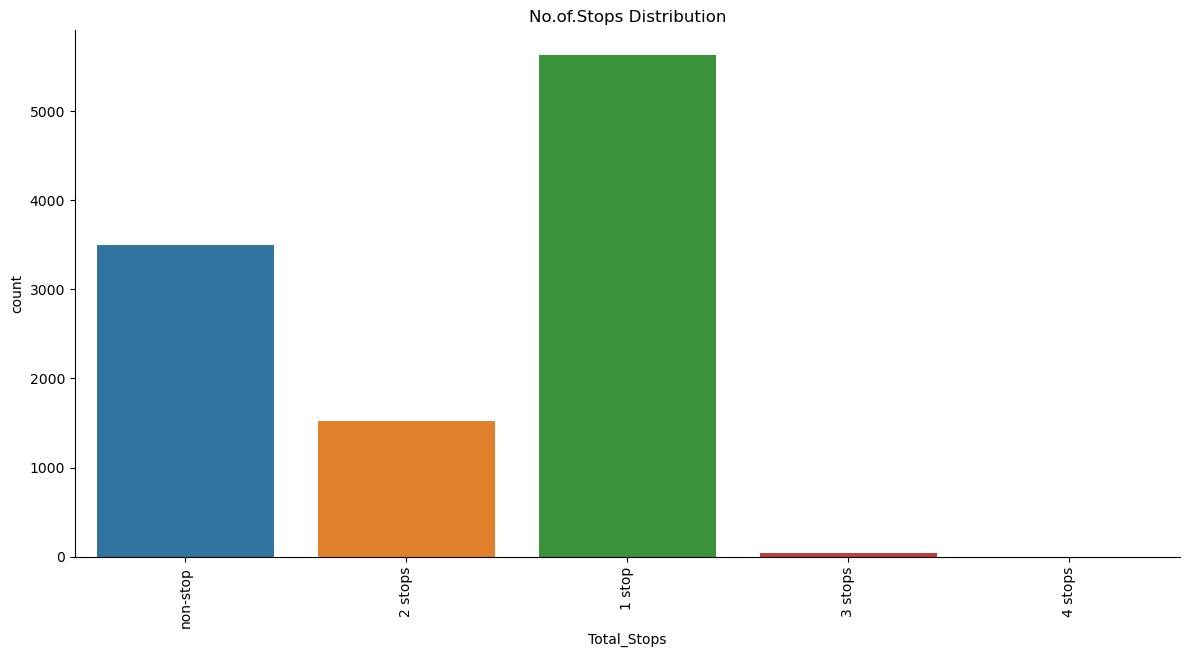

In [46]:
# Visualizing No.of.Stops distribution 
sns.catplot(data=df, x='Total_Stops', kind='count', height=6, aspect=2)
plt.xticks(rotation=90)
plt.title('No.of.Stops Distribution')
plt.show()

In [47]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

### Flights have maximim of 4 stops with most flights being **Non-Stop** and only 1 flight being **4 stops**.

### No.of.Stops Vs Price

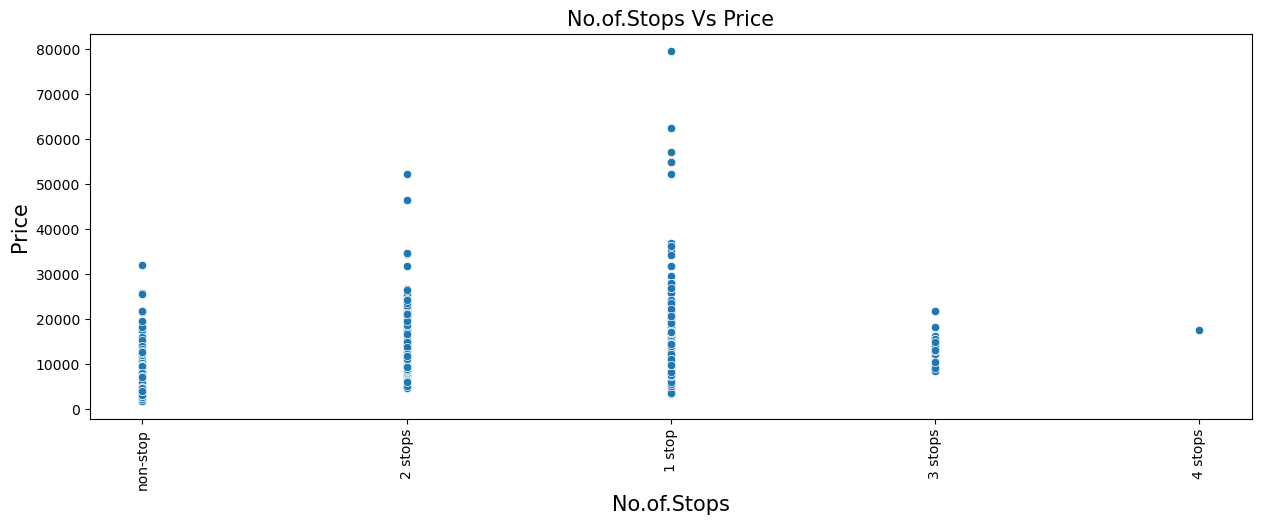

In [48]:
#Visualising No.of.Stops VS Price
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Total_Stops'],y=df['Price'],palette='hls')
plt.title('No.of.Stops Vs Price',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('No.of.Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Airlines with **1 stop** has a maximum flight fare.

In [49]:
#Checking for Nan Values
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_in_minutes
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,None,None,None,None,None,9,45,9,25,1420


In [50]:
#Replacing Nan values with 1 Stops
df['Total_Stops']=df['Total_Stops'].fillna('1 stop')

In [51]:
#Replacing Non-Stop with 0 Stops
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [52]:
#Stripping Total Stops to Stop
df['Stop'] = df['Total_Stops'].str.split(' ').str[0]

In [53]:
#Converting Stop from Object to Int and drop Total_Stops
df['Stop']=df['Stop'].astype(int)
df=df.drop(['Total_Stops'],axis=1)

In [54]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_in_minutes,Stop
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,BLR,DEL,None,None,None,22,20,1,10,170,0
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,CCU,IXR,BBI,BLR,None,5,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,DEL,LKO,BOM,COK,None,9,25,4,25,1140,2
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,CCU,NAG,BLR,None,None,18,5,23,30,325,1
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,BLR,NAG,DEL,None,None,16,50,21,35,285,1


## Additional Info

In [55]:
df["Additional_Info"].value_counts().head(2)

Additional_Info
No info                        8345
In-flight meal not included    1982
Name: count, dtype: int64

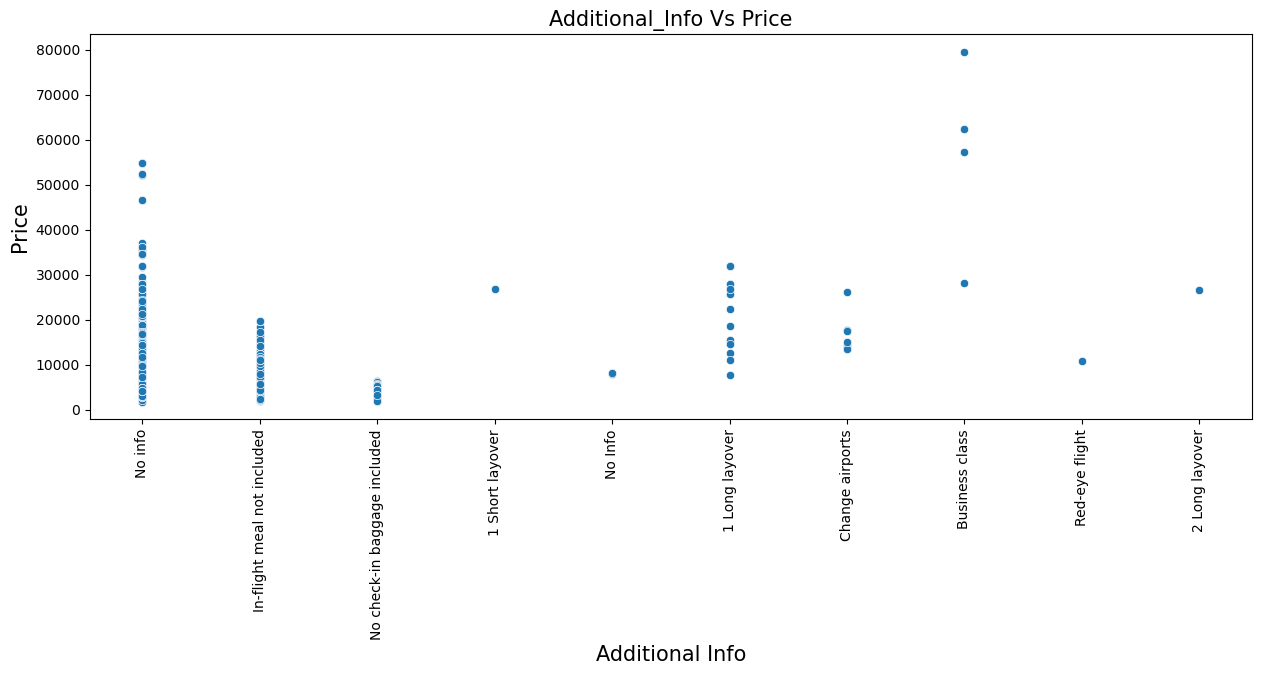

In [56]:
#Visualising Additional Info VS Price
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Additional_Info'],y=df['Price'],palette='hls')
plt.title('Additional_Info Vs Price',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Additional Info',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Most flights have no additional info and Business Class Fight have the highest Flight Fare.

## Price

In [57]:
df["Price"].value_counts()

Price
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: count, Length: 1870, dtype: int64

In [58]:
#Checking for Null Values in Price Column
df['Price'].isna().sum()

0

In [59]:
#Label Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Airline"]=encoder.fit_transform(df['Airline'])
df["Source"]=encoder.fit_transform(df['Source'])
df["Destination"]=encoder.fit_transform(df['Destination'])
df["Additional_Info"]=encoder.fit_transform(df['Additional_Info'])
df["Route_1"]=encoder.fit_transform(df['Route_1'])
df["Route_2"]=encoder.fit_transform(df['Route_2'])
df["Route_3"]=encoder.fit_transform(df['Route_3'])
df["Route_4"]=encoder.fit_transform(df['Route_4'])
df["Route_5"]=encoder.fit_transform(df['Route_5'])

In [60]:
#Checking for data types of the DataFrame
df.dtypes

Airline                int32
Source                 int32
Destination            int32
Additional_Info        int32
Price                  int64
Date                   int32
Month                  int32
Year                   int32
Route_1                int32
Route_2                int32
Route_3                int32
Route_4                int32
Route_5                int32
Departure_Hour         int32
Departure_Minute       int32
Arrival_Hour           int32
Arrival_Minute         int32
Duration_in_minutes    int64
Stop                   int32
dtype: object

In [61]:
#Checking for Null Values in DataFrame
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price                  0
Date                   0
Month                  0
Year                   0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
Departure_Hour         0
Departure_Minute       0
Arrival_Hour           0
Arrival_Minute         0
Duration_in_minutes    0
Stop                   0
dtype: int64

 ## INSIGHTS

1) **Jet Airways** has the most number of flights and **Trujet** has the least number of flights.

2) **Jet Airways Business** has the highest flight fare compared to other airlines.

3) **Delhi** is the highest journeyed source and **Chennai** is the lowest journeyed source.

4) **Bangalore** is the source with highest flight fare.

5) **Cochin** is the most journeyed Destination and **Kolkata** is the least journeyed Destination.

6) **New Delhi** is the Destination with the highest flight fare.

7) Most flights hae the route **"DEL-BOM-COK"**.

8) Most flights have Depature Time **18:55**.

9) Most flights have Arrival Time **19:00**.

10) **170 Minutes** is the duration of most flights.

11) Most flights have maximim of 4 stops with most flights being **Non-Stop** and only 1 flight being **4 stops**.

12) Airlines with **1 stop** has a maximum flight fare.

13) **18/05/2019** is the most traveled date with **504** flights and **1/03/2019** is the least traveled date with **47** flights.

14) Most flights have no additoinal info and **Business Class** have the highest flight fare.

#  Model selection and model preparation

In [62]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_in_minutes,Stop
0,3,0,5,8,3897,24,3,2019,0,13,24,12,4,22,20,1,10,170,0
1,1,3,0,8,7662,1,5,2019,2,25,1,3,4,5,50,13,15,445,2
2,4,2,1,8,13882,9,6,2019,3,32,4,5,4,9,25,4,25,1140,2
3,3,3,0,8,6218,12,5,2019,2,34,3,12,4,18,5,23,30,325,1
4,3,0,5,8,13302,1,3,2019,0,34,8,12,4,16,50,21,35,285,1


In [63]:
df.tail()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_in_minutes,Stop
10678,0,3,0,8,4107,9,4,2019,2,5,24,12,4,19,55,22,25,150,0
10679,1,3,0,8,4145,27,4,2019,2,5,24,12,4,20,45,23,20,155,0
10680,4,0,2,8,7229,27,4,2019,0,13,24,12,4,8,20,11,20,180,0
10681,10,0,5,8,12648,1,3,2019,0,13,24,12,4,11,30,14,10,160,0
10682,1,2,1,8,11753,9,5,2019,3,16,4,5,4,10,55,19,15,500,2


In [64]:
df_train=df[0:10683]
df_test=df[10683:]

In [65]:
#Splitting the DataSet
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [66]:
#Testing and Training Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Feature Selection

In [67]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [68]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [69]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [70]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [71]:
selected_features=X_train.columns[(model.get_support())]

In [72]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_in_minutes', 'Stop'],
      dtype='object')

In [73]:
df['Year'].value_counts()

Year
2019    10683
Name: count, dtype: int64

In [74]:
#Droping 'Year' from Training Dataset
X_train=X_train.drop(['Year'],axis=1)

In [75]:
#Droping 'year' from Testing Dataset
X_test=X_test.drop(['Year'],axis=1)

## Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journeys accordingly and airlines to maintain their flight fares accordingly.

## Random Forest Regressor

In [76]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [77]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [78]:
y_pred_rf=rf.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

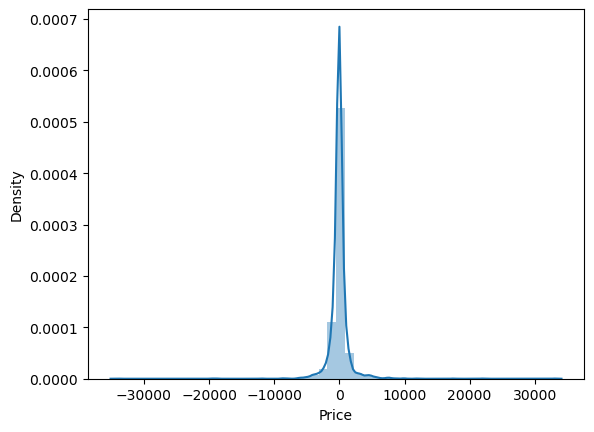

In [79]:
import seaborn as sns

sns.distplot(y_test-y_pred_rf)

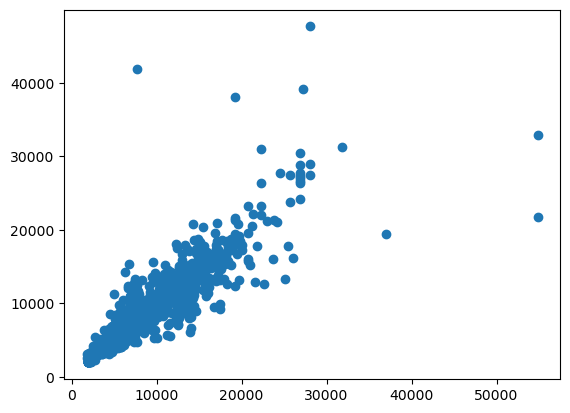

In [80]:
plt.scatter(y_test,y_pred_rf)

In [81]:
 from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Train R2 :", rf.score(X_train, y_train))
print("Test R2: ", rf.score(X_test, y_test))
print("Cross Validation Score: ", scores.mean())

Train R2 : 0.9789754782103485
Test R2:  0.863001224541794
Cross Validation Score:  0.8684037481044182


## Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

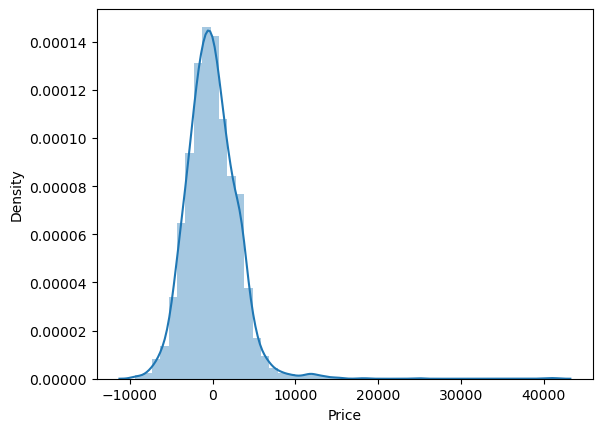

In [83]:
import seaborn as sns

sns.distplot(y_test-y_pred_lr)

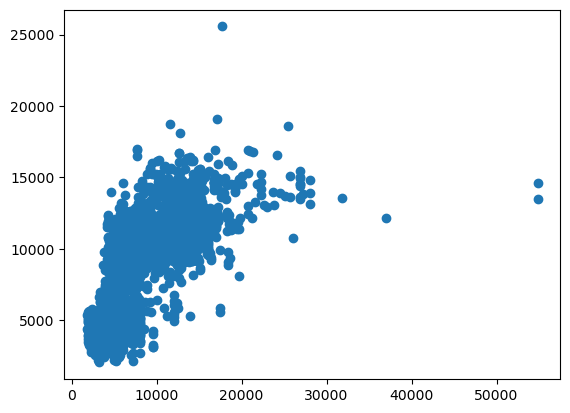

In [84]:
plt.scatter(y_test,y_pred_lr)

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Train R2 :", lr.score(X_train, y_train))
print("Test R2: ", lr.score(X_test, y_test))
print("Cross Validation Score: ", scores.mean())

Train R2 : 0.4928476638474014
Test R2:  0.5052620921117357
Cross Validation Score:  0.4921445864034875


## Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

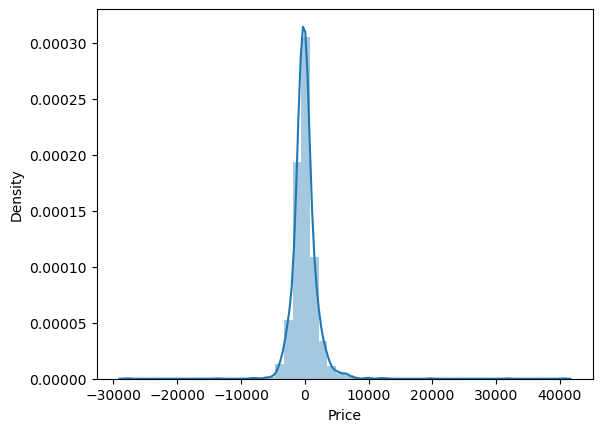

In [87]:
import seaborn as sns

sns.distplot(y_test-y_pred_gb)

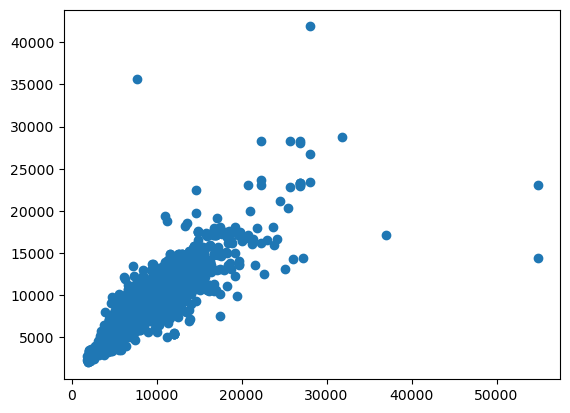

In [88]:
plt.scatter(y_test,y_pred_gb)

In [89]:
scores = cross_val_score(gb, X_train, y_train, cv=5)
print("Train R2 :", gb.score(X_train, y_train))
print("Test R2: ", gb.score(X_test, y_test))
print("Cross Validation Score: ", scores.mean())

Train R2 : 0.8536153060333617
Test R2:  0.795467446324285
Cross Validation Score:  0.8366849750616183


## XGBoost Regressor

In [90]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

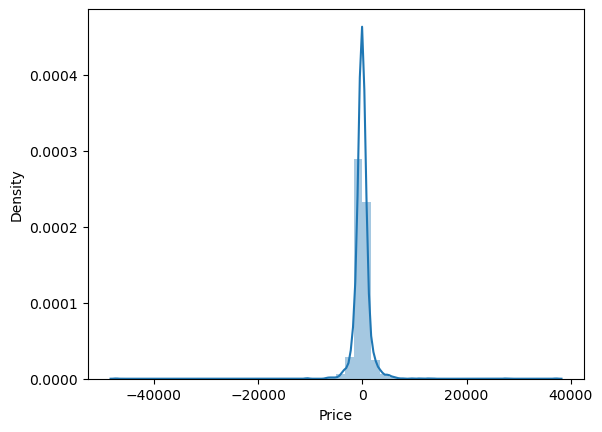

In [91]:
import seaborn as sns

sns.distplot(y_test-y_pred_xgb)

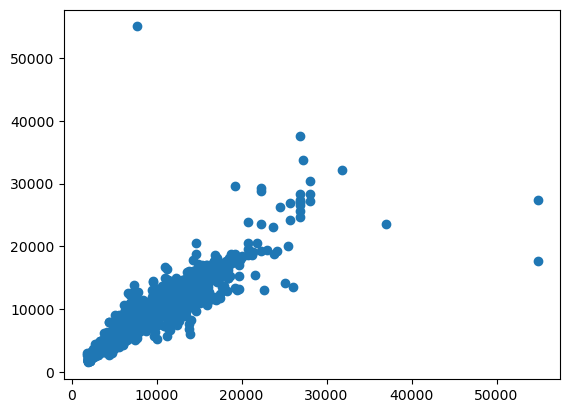

In [92]:
plt.scatter(y_test, y_pred_xgb)

In [93]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print("Train R2 :", xgb.score(X_train, y_train))
print("Test R2: ", xgb.score(X_test, y_test))
print("Cross Validation Score: ", scores.mean())

Train R2 : 0.9430822943958048
Test R2:  0.8453599068881622
Cross Validation Score:  0.8813273880580708


## Lasso Regression

In [94]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

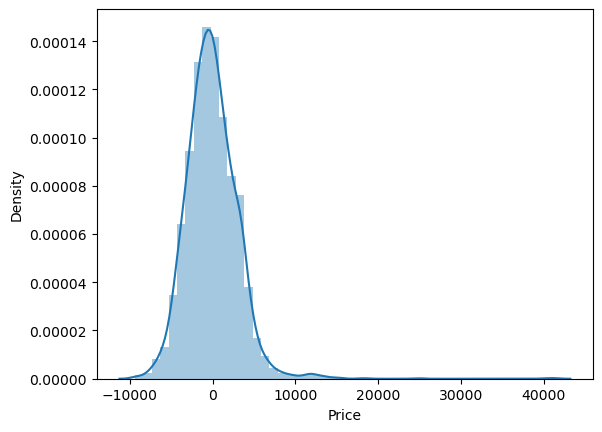

In [95]:
import seaborn as sns

sns.distplot(y_test-y_pred_lasso)

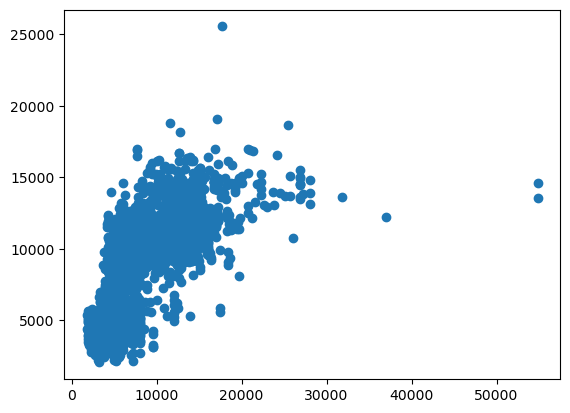

In [96]:
plt.scatter(y_test, y_pred_lasso)

In [97]:
scores = cross_val_score(lasso, X_train, y_train, cv=5)
print("Train R2 :", lasso.score(X_train, y_train))
print("Test R2: ", lasso.score(X_test, y_test))
print("Cross Validation Score: ", scores.mean())

Train R2 : 0.49284758918712457
Test R2:  0.50526749530933
Cross Validation Score:  0.492146043882714


## ElasticNet Regression

In [98]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha = 0.1, l1_ratio = 0.7)
en.fit(X_train, y_train)
y_pred_en = en.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

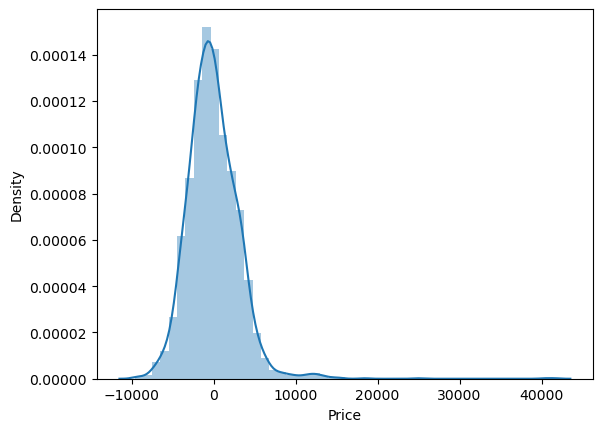

In [99]:
import seaborn as sns

sns.distplot(y_test-y_pred_en)

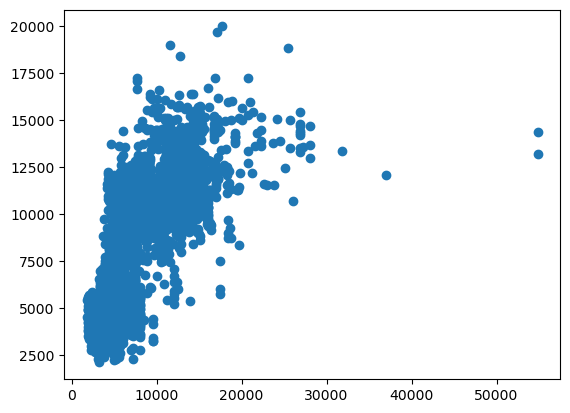

In [100]:
plt.scatter(y_test, y_pred_en)

In [101]:
scores = cross_val_score(en, X_train, y_train, cv=5)
print("Train R2 :", en.score(X_train, y_train))
print("Test R2: ", en.score(X_test, y_test))
print("Cross Validation Score: ", scores.mean())

Train R2 : 0.4893130470320014
Test R2:  0.5008363241404568
Cross Validation Score:  0.48922123729694206


## Calculating MEA, MSE, RMSE, R2 Score And Adjusted R2 Score

In [102]:
from sklearn import metrics

In [103]:
#Mean Absolute error
mea_rf = round(metrics.mean_absolute_error(y_test, y_pred_rf))
mea_lr = round(metrics.mean_absolute_error(y_test, y_pred_lr))
mea_gb = round(metrics.mean_absolute_error(y_test, y_pred_gb))
mea_xgb = round(metrics.mean_absolute_error(y_test, y_pred_xgb))
mea_lasso = round(metrics.mean_absolute_error(y_test, y_pred_lasso))
mea_en = round(metrics.mean_absolute_error(y_test, y_pred_en))

In [104]:
#Mean Square Error
mse_rf = round(metrics.mean_squared_error(y_test, y_pred_rf))
mse_lr = round(metrics.mean_squared_error(y_test, y_pred_lr))
mse_gb = round(metrics.mean_squared_error(y_test, y_pred_gb))
mse_xgb = round(metrics.mean_squared_error(y_test, y_pred_xgb))
mse_lasso = round(metrics.mean_squared_error(y_test, y_pred_lasso))
mse_en = round(metrics.mean_squared_error(y_test, y_pred_en))

In [105]:
#Root Mean Square Error
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
rmse_en = np.sqrt(metrics.mean_squared_error(y_test, y_pred_en))

In [106]:
#R2 score
r2_score_rf = (metrics.r2_score(y_test, y_pred_rf))
r2_score_lr = (metrics.r2_score(y_test, y_pred_lr))
r2_score_gb = (metrics.r2_score(y_test, y_pred_gb))
r2_score_xgb = (metrics.r2_score(y_test, y_pred_xgb))
r2_score_lasso = (metrics.r2_score(y_test, y_pred_lasso))
r2_score_en = (metrics.r2_score(y_test, y_pred_en))

In [107]:
#Adjusted R2 score
adj_r2_score_rf = round(1 - (1-r2_score_rf)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
adj_r2_score_lr = round(1 - (1-r2_score_lr)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
adj_r2_score_gb = round(1 - (1-r2_score_gb)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
adj_r2_score_xgb = round(1 - (1-r2_score_xgb)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
adj_r2_score_lasso = round(1 - (1-r2_score_lasso)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
adj_r2_score_en = round(1 - (1-r2_score_en)*(len(y)-1)/(len(y)-X.shape[1]-1),6)

In [108]:
model_metrics= [["Random Forest Regressor",mea_rf,mse_rf,rmse_rf,r2_score_rf,adj_r2_score_rf],
                ["Linear Regressor",mea_lr, mse_lr,rmse_lr,r2_score_lr,adj_r2_score_lr],
                ["Gradient Boosting Regressor",mea_gb,mse_gb,rmse_gb,r2_score_gb,adj_r2_score_gb],
                ["XGBoost Regressor",mea_xgb,mse_xgb,rmse_xgb,r2_score_xgb,adj_r2_score_xgb],
                ["Lasso Regressor",mea_lasso,mse_lasso,rmse_lasso,r2_score_lasso,adj_r2_score_lasso],
                ["Elastic Net Regressor",mea_en,mse_en,rmse_en,r2_score_en,adj_r2_score_en]]
dfr = pd.DataFrame(model_metrics, columns = ["Name","Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

In [109]:
dfr

,Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Adjusted R2 Score
0,Random Forest Regressor,692,2775109,1665.865817,0.863001,0.862770
1,Linear Regressor,2312,10021634,3165.696442,0.505262,0.504427
2,Gradient Boosting Regressor,1228,4143104,2035.461510,0.795467,0.795122
3,XGBoost Regressor,871,3132459,1769.875532,0.845360,0.845099
4,Lasso Regressor,2311,10021525,3165.679155,0.505267,0.504432
5,Elastic Net Regressor,2316,10111284,3179.824573,0.500836,0.499994


##### After evaluating the multiple models we getting highest r2 score of 86.30% and least mean squared error for the RandomForestRegressor model so we are concluding that RandomForestRegressor is the best model which will help the Customers to plan their journey and Airlines to maintain flight fares accordingly.

In [110]:
#Actual Price Vs Predicted Price using Random Forest
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred_rf})
result=df.merge(out,left_index=True,right_index=True)

In [111]:
result.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,...,Route_4,Route_5,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_in_minutes,Stop,Price_actual,Price_pred
9,6,2,1,8,8625,27,5,2019,3,7,...,12,4,11,25,19,15,470,1,8625,7736.66
15,1,2,1,8,14011,3,3,2019,3,0,...,5,4,16,40,19,15,1595,2,14011,12584.04
18,1,2,1,8,13381,12,6,2019,3,9,...,5,4,20,15,19,15,1380,2,13381,13394.36
20,2,2,1,8,19495,6,3,2019,3,7,...,12,4,14,10,19,20,310,1,19495,16675.65
22,3,0,2,8,3943,3,4,2019,0,13,...,12,4,4,0,6,50,170,0,3943,4031.02


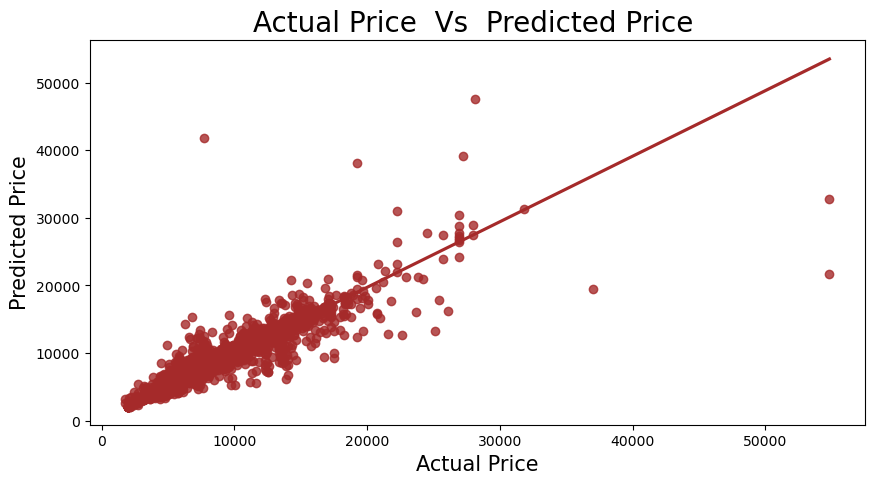

In [112]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result, color='brown', robust=True)
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

## CONCLUSION

## TASK 1
## EDA is performed and here is the key insights and overall data analysis report.

1.Introduction

This report analyzes flight journey data of different airlines. The dataset includes 10,683 data points with 11 features, focusing on understanding airline data, date of journey, source, destination, arrival time, depature time and other features of the flight journey.

2.Dataset Overview

Features: The dataset comprises 11 features, including both numerical (1) and categorical (10) variables.

Target Variable: Price is chosen as the target variable.

Data Quality: Two columns **"Route"** and **"Total_Stops"** have 1 Nan value and column **"Price"** with std.deviation of **4611.35**.

3.Airlines, Date of Journey, Source and Destination:
Airline:
**Jet Airways** has the most number of flights and **Trujet** has the least number of flights.

**Jet Airways Business** has the highest flight fare compared to other airlines.

Date of Journey:

**18/05/2019** is the most traveled date with **504** flights and **1/03/2019** is the least traveled date with **47** flights.

Source:

**Delhi** is the highest journeyed source and **Chennai** is the lowest journeyed source airport.

Destination:

**Cochin** is the most journeyed Destination and **Kolkata** is the least journeyed Destination airport.

4.Route, Dep_Time, Arrival_Time, Duration and Total_Stops:

Most flights have maximim of 4 stops with most flights being **Non-Stop** and only 1 flight being **4 stops**.

## Task 2
### Model Creation
We built 6 predictive models:
1. Random Forest Regressor
2. Linear Regression
3. Gradient Boosting Regressor
4. XGBoost Regressor
5. Lasso Regressor
6. Elastic Net Regression

After evaluating the multiple models we getting highest R2 score of **87.48%** and least mean squared error for the RandomForestRegressor model so we are concluding that **RandomForestRegressor** is the best model which will help the Customers to plan their journey and Airlines to maintain flight fares accordingly.

### There are some of challenges that as a team we face are :
Data Quality:
Inconsistent formats in data entries can hinder accurate analysis and modeling.Flight timing in Arrival Time have Inconsistant Format.To overcome this, we stripped Time format from Arrival Time making it uniform with Depature Time.

External Features:
Flight prices are influenced by many factors outside the dataset, like weather, holidays, sudden demand surges, offers on websites, cards at the airport.Those features are not considered in the dataset, considering them would help making accurate prediction. 